### Classification Problem

In [1]:
import pandas as pd
import numpy as np
data_1a=pd.read_csv(r"C:\Users\Gupta\Downloads\exp1a.csv")
data_1b=pd.read_csv(r"C:\Users\Gupta\Downloads\exp1b.csv")
data_1c=pd.read_csv(r"C:\Users\Gupta\Downloads\exp1c.csv")

In [2]:
#check the data
data_1a.head()

,x,y,class
0,0.62945,0.288640,1
1,0.81158,-0.242780,1
2,-0.74603,0.623160,1
3,0.82675,0.065651,1
4,0.26472,-0.298550,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000265A407C988>,
      dtype=object)

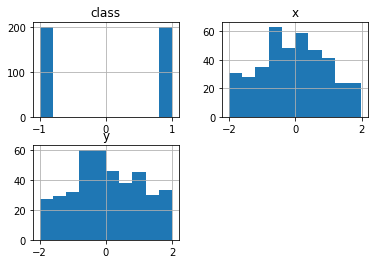

In [3]:
import matplotlib.pyplot as plt
data_1a.hist()# Visualization of  each feature distribution(values) in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000265A491B248>,
      dtype=object)

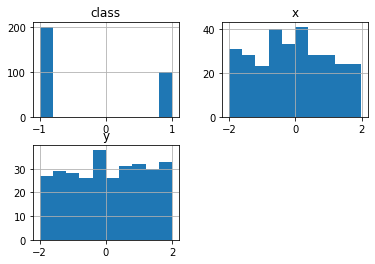

In [4]:
data_1b.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000265A4B6E048>,
      dtype=object)

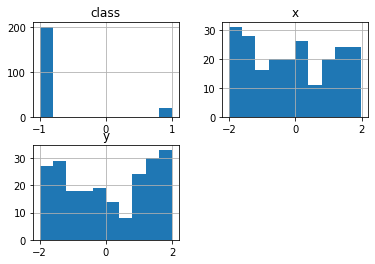

In [6]:
data_1c.hist()

In [8]:
#Create Y array for the output and X array for the input features
X_1a=data_1a.iloc[:,:-1].values
y_1a=data_1a.iloc[:,-1:].values
X_1b=data_1b.iloc[:,:-1].values
y_1b=data_1b.iloc[:,-1:].values
X_1c=data_1c.iloc[:,:-1].values
y_1c=data_1c.iloc[:,-1:].values

X_data=[X_1a,X_1b,X_1c] #created a list of all the three dataset which contain X features
y_data=[y_1a,y_1b,y_1c] #created a lisr of all the three dataset which conatin Y features


In [62]:
# using Nearest Neighbour Classifier for the dataset with differen values=1,5,11,21
n_neighbors=[1,5,11,21]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict #Evaluate a score by cross-validation
#cross_val_prediction is to generate cross-validated estimates for each input data point
from sklearn.metrics import confusion_matrix, plot_confusion_matrix # performance Anaylsis by using confusion martix
a=[]
for X,y in zip(X_data,y_data):
    for k in n_neighbors:
        y=y.ravel()
        clf=KNeighborsClassifier(n_neighbors=k)
        y_pred=cross_val_predict(clf,X,y,cv=10)
        matrix=confusion_matrix(y,y_pred,labels=[1,-1])
        score=cross_val_score(clf,X,y,cv=10)
        a.append((max(score)+min(score))/2)
        print( "The n_neigbhor value is:",k)
        print("The confusion matrix:\n",matrix)
        print("cross validation score for the different value of neighbour:\n",score)

The n_neigbhor value is: 1
The confusion matrix:
 [[197   3]
 [  6 194]]
cross validation score for the different value of neighbour:
 [0.975 0.975 1.    0.975 1.    1.    1.    0.9   0.975 0.975]
The n_neigbhor value is: 5
The confusion matrix:
 [[198   2]
 [ 17 183]]
cross validation score for the different value of neighbour:
 [0.95  0.975 1.    0.95  0.975 0.95  0.925 0.925 0.9   0.975]
The n_neigbhor value is: 11
The confusion matrix:
 [[200   0]
 [ 23 177]]
cross validation score for the different value of neighbour:
 [0.95  0.95  1.    0.95  0.95  0.95  0.925 0.9   0.875 0.975]
The n_neigbhor value is: 21
The confusion matrix:
 [[200   0]
 [ 29 171]]
cross validation score for the different value of neighbour:
 [0.95  0.925 0.925 0.925 0.95  0.95  0.9   0.9   0.875 0.975]
The n_neigbhor value is: 1
The confusion matrix:
 [[ 95   5]
 [  7 193]]
cross validation score for the different value of neighbour:
 [0.96666667 0.96666667 1.         0.93333333 0.96666667 1.
 0.96666667 0.93

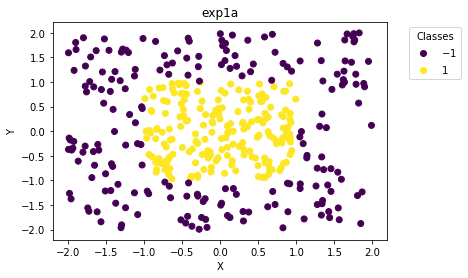

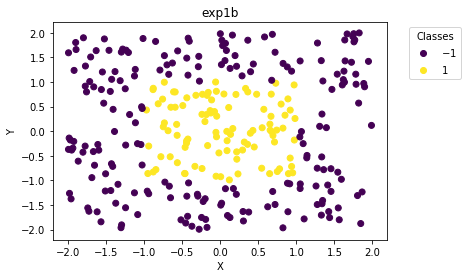

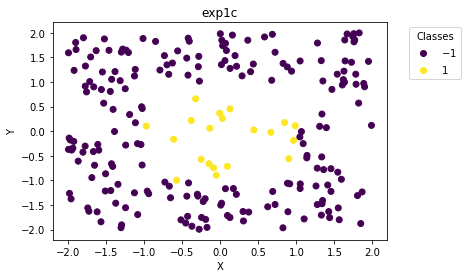

In [40]:
#Visualization of the dataset
import seaborn as sns
data_list=['a','b','c']
for X,y,i in zip(X_data,y_data,data_list):
    scatter=plt.scatter(X[:,:1],X[:,1:],c=y[:])
    legend1=plt.legend(*scatter.legend_elements(),title="Classes",bbox_to_anchor=(1.05,1),loc='upper left')
    #produce a legend with different colors, dimensions of the legend and postion of the legend box
    plt.title("exp1"+ i)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

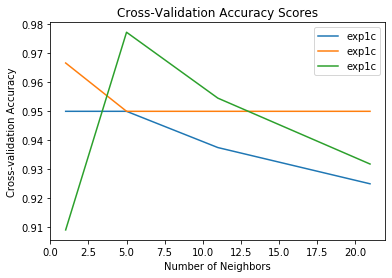

In [113]:
#Visualisation of the cross-validation Accuracy Scores
c=a[0:4]
d=a[4:8]
e=a[8:13]
Z=[c,d,e]

for k,j in zip(n_neighbors,Z):
    plt.plot(n_neighbors,j)
        
plt.title("Cross-Validation Accuracy Scores")
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-validation Accuracy')
plt.legend()